<a href="https://colab.research.google.com/github/DeathSlayer1707/random_gigs/blob/main/RAJ_SVMmethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/meltpool_dataset.csv')
df.head()

,Laser Power (W),Scan Speed (mm/s),Beam Diameter (mm),Cooling Rate (°C/s),Shielding Gas Composition (%),Melt Pool Intensity (mm),Melt Pool Width (mm),Defect Type
0,249.816047,96.283232,1.023411,1172.702994,57.199588,0.651090,1.366863,Uneven Surface
1,480.285723,185.475237,0.993958,1296.681397,80.543233,0.762810,0.510295,Porosity
2,392.797577,268.236459,2.312509,750.467899,76.016093,1.296366,1.770310,Uneven Surface
3,339.463394,233.056222,0.999092,1124.874100,15.389990,0.576006,1.303609,Uneven Surface
4,162.407456,251.640287,1.043899,1071.745983,14.924947,1.317510,0.482967,Porosity


In [6]:
le = LabelEncoder()
y = le.fit_transform(df['Defect Type'])

X = df.drop(['Defect Type'], axis=1)
X.head()

,Laser Power (W),Scan Speed (mm/s),Beam Diameter (mm),Cooling Rate (°C/s),Shielding Gas Composition (%),Melt Pool Intensity (mm),Melt Pool Width (mm)
0,249.816047,96.283232,1.023411,1172.702994,57.199588,0.651090,1.366863
1,480.285723,185.475237,0.993958,1296.681397,80.543233,0.762810,0.510295
2,392.797577,268.236459,2.312509,750.467899,76.016093,1.296366,1.770310
3,339.463394,233.056222,0.999092,1124.874100,15.389990,0.576006,1.303609
4,162.407456,251.640287,1.043899,1071.745983,14.924947,1.317510,0.482967


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
svm_clf = SVC(kernel='rbf', C=5.0, gamma='scale')
svm_clf.fit(X_train_scaled, y_train)

SVC(C=5.0)

In [30]:
y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.2866666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.34      0.33        35
           1       0.27      0.29      0.28        42
           2       0.26      0.26      0.26        38
           3       0.32      0.26      0.29        35

    accuracy                           0.29       150
   macro avg       0.29      0.29      0.29       150
weighted avg       0.29      0.29      0.29       150



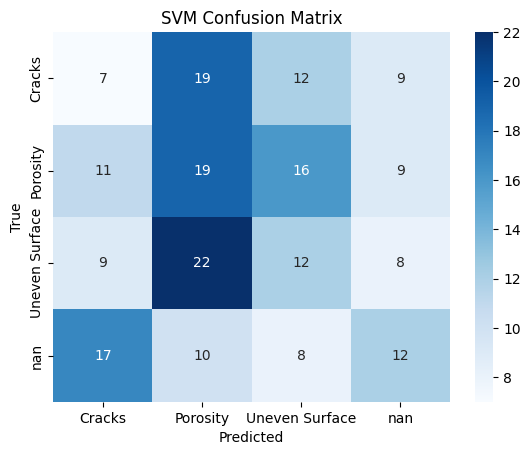

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {
    'C': [0.1, 1, 10, 100],                      # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],    # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly']          # Kernel type
}
svc = SVC()
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=2,                      # 5-fold cross-validation
    scoring='accuracy',       # Evaluation metric
)

# Fit on scaled training data
# grid_search.fit(X_train_scaled, y_train)


In [37]:
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_svm = grid_search.best_estimator_

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.3058823529411765


Test Accuracy: 0.24666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.14      0.16        35
           1       0.28      0.38      0.32        42
           2       0.22      0.21      0.21        38
           3       0.29      0.23      0.25        35

    accuracy                           0.25       150
   macro avg       0.24      0.24      0.24       150
weighted avg       0.24      0.25      0.24       150



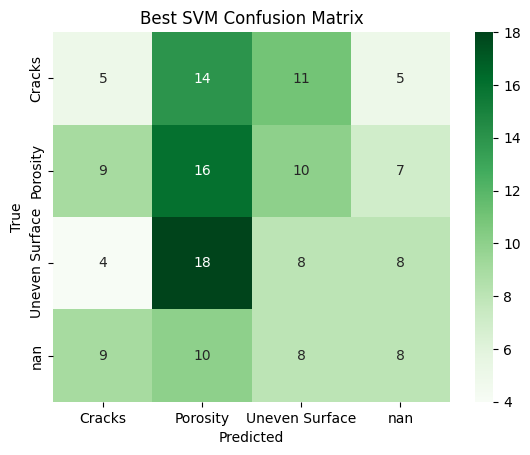

In [38]:
y_pred_best = best_svm.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Best SVM Confusion Matrix')
plt.show()